# Class 07 ESG Data Identification #

## **Personal Homework Goals**
- Import MSCI Non-ESG and ESG Leader Dataset into JupyterLab
- Explore dataset and identify head, tail, mean, median, and mode
- Try to conduct a preliminary analysis

##  **Importing the necessary libraries and overview of the dataset**

In [43]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

### **Loading the dataset**

In [68]:
data = pd.read_csv("emdset 1.csv")

In [69]:
df = data.copy()

### Data Overview

In [71]:
data

,Date,Non ESG EM,ESG EM
0,9-Oct-19,993.01,1082.01
1,10-Oct-19,996.5,1085.50
2,11-Oct-19,"1,011.54",1100.54
3,14-Oct-19,"1,017.45",1106.45
4,15-Oct-19,"1,019.25",1108.25
...,...,...,...
1038,2-Oct-23,951.49,1040.49
1039,3-Oct-23,939.164,1028.16
1040,4-Oct-23,927.86,1016.86
1041,5-Oct-23,930.23,1019.23


In [72]:
#Shows first five observations
data.head()

,Date,Non ESG EM,ESG EM
0,9-Oct-19,993.01,1082.01
1,10-Oct-19,996.5,1085.50
2,11-Oct-19,"1,011.54",1100.54
3,14-Oct-19,"1,017.45",1106.45
4,15-Oct-19,"1,019.25",1108.25


In [73]:
#Shows last five observations
data.tail()

,Date,Non ESG EM,ESG EM
1038,2-Oct-23,951.49,1040.49
1039,3-Oct-23,939.164,1028.16
1040,4-Oct-23,927.86,1016.86
1041,5-Oct-23,930.23,1019.23
1042,6-Oct-23,937.338,1026.34


In [74]:
data.info()
# There are three 1043 data points of study, interestingly two of them objects and one of them is a float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1043 non-null   object 
 1   Non ESG EM  1043 non-null   object 
 2   ESG EM      1043 non-null   float64
dtypes: float64(1), object(2)
memory usage: 24.6+ KB


In [83]:
#Find the range of ESG Market Capitalizations
max_ESG = df["ESG EM"].max()
min_ESG = df["ESG EM"].min()
print("The ESG dataset values range from", min_ESG, "to", max_ESG)

The ESG dataset values range from 847.2 to 1533.93


In [85]:
#Find the range of Non-ESG Market Capitalizations
max_NonESG = df["Non ESG EM"].max()
min_NonESG = df["Non ESG EM"].min()
print("The Non ESG EM dataset values range from", max_NonESG, "to", min_NonESG)

The Non ESG EM dataset values range from 999.575 to 1,000.19


In [86]:
#Assign different columns of data into different series
ESG = data['ESG EM']
NonESG = data['Non ESG EM']
Date = data['Date']

### Plot graph displaying both datasets of market capitalization against each other

Text(0.5, 1.0, 'Market Capitalization of ESG-Integrated EM Indices Outperform Non-ESG Integrated EM Indices')

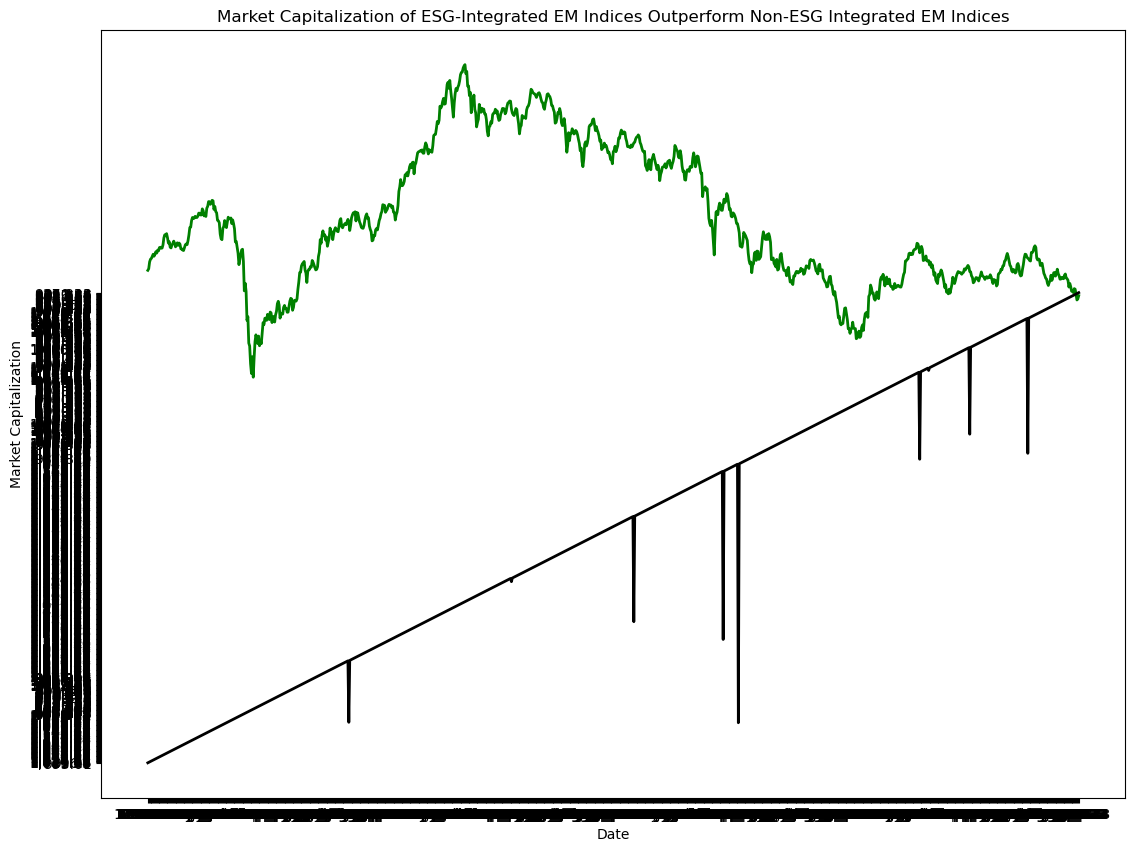

In [101]:
#Attempt at constructing a graph
fig=plt.figure()
myaxes=fig.add_axes([0.1,0.1,1.6,1.6])

#Add data to the graph
myaxes.plot(Date, ESG,'green',lw=2)
myaxes.plot(Date, NonESG,'black',lw=2)

#Set labels
myaxes.set_xlabel('Date')
myaxes.set_ylabel('Market Capitalization')
myaxes.set_title(label="Market Capitalization of ESG-Integrated EM Indices Outperform Non-ESG Integrated EM Indices")
#myaxes.legend()

### Plot graph displaying market cap of Non-ESG integrated companies

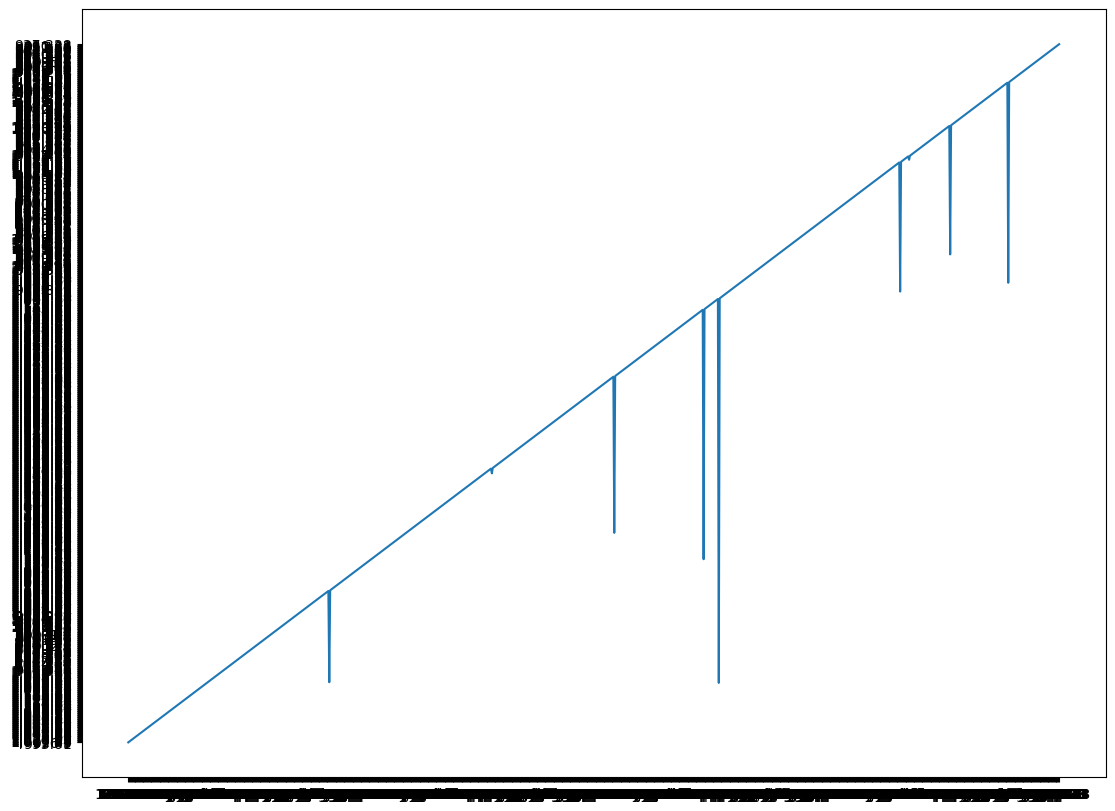

In [90]:
#Attempt at constructing a graph
fig=plt.figure()
myaxes=fig.add_axes([0.1,0.1,1.6,1.6])

#Add data to the graph
myaxes.plot(Date, NonESG,)